In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import wilcoxon, shapiro, friedmanchisquare

##### Read the data file

In [2]:
latencies=(pd.read_excel('LATENCIES CATCH SESSIONS.xlsx', index_col=None))
latencies.head()

,rat,catch_nr,trial,latency_s1,latency_s2,latency_s3,latency_t1,latency_t2,latency_t3
0,1,1,-5,1.09,0.38,0.93,0.88,0.44,1.22
1,1,1,-4,1.42,0.91,1.33,0.92,0.33,1.06
2,1,1,-3,0.88,0.54,1.03,0.88,0.37,1.33
3,1,1,-2,0.84,0.38,1.02,0.90,0.41,1.31
4,1,1,-1,2.74,3.15,1.46,1.01,0.40,1.06


##### Calculate the latency to express choice (latency t1 + latency t2)

In [3]:
latencies['latency_to_choice']=latencies['latency_t1'] + latencies['latency_t2']

##### Does latency to express choice increase in catch trials?

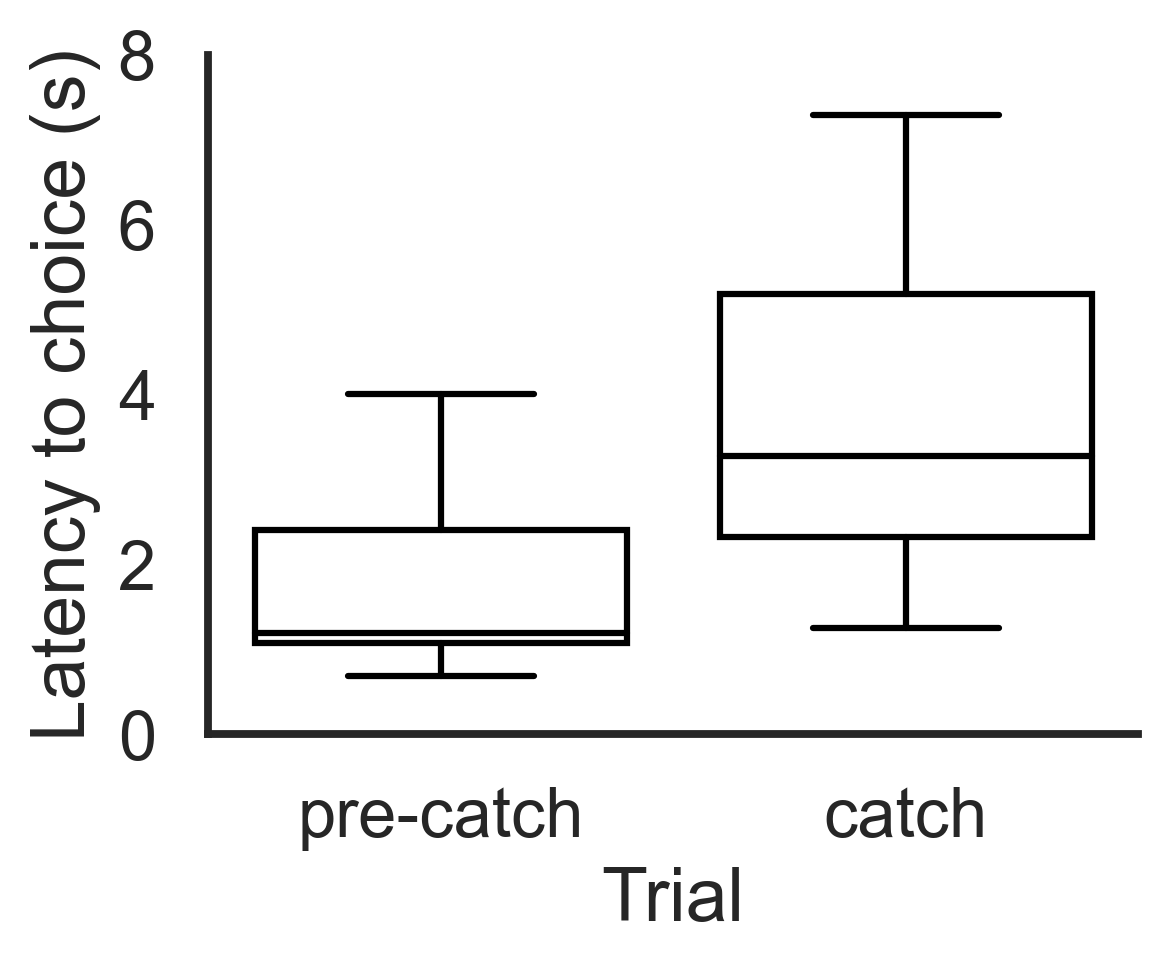

In [5]:
#Subset the data
subset=latencies[(latencies['trial']>=-1)]

PROPS = {'boxprops':{'facecolor':'none', 'linewidth':1.5},
         'whiskerprops':{'linewidth': 1.5},
         'capprops':{'linewidth': 1.5},
         'medianprops':{'linewidth': 1.5}}

plt.figure(dpi=300, figsize=(4,3))
sns.set(style='white', context='talk')
g=sns.boxplot(
    data=subset, x='trial', fliersize=0,
    y='latency_to_choice', 
    color='black', 
    **PROPS)

g.set(xlabel='Trial', ylabel='Latency to choice (s)', 
      #title='Latency to choice expression \n',
      xticklabels=['pre-catch','catch'], xlim=[-.5,1.5], ylim=[0,8])

sns.despine()
plt.savefig('latency_to_choice_pre_vs_catch.svg')

,statistic,p,kurtosis,skewness
-1,0.311837,1.158219e-13,39.924842,6.105359
0,0.597849,3.080665e-10,11.933360,3.232390


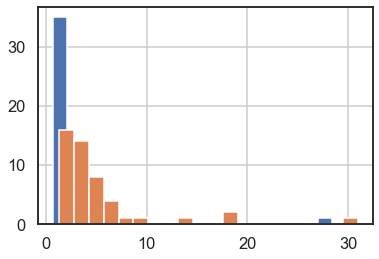

In [33]:
results=pd.DataFrame()
for i in subset.trial.unique():
    
    group = subset.loc[subset.trial==i, 'latency_to_choice']
    
    stat, p = shapiro(group)
    results.loc[i, 'statistic']=stat
    results.loc[i, 'p']=p
    results.loc[i,'kurtosis']=group.kurt()
    results.loc[i,'skewness']=group.skew()
    group.hist(bins=20)
results

In [34]:
from scipy.stats import wilcoxon
pre_catch=subset[subset['trial']==-1]
catch=subset[subset['trial']==0]

wilcoxon(pre_catch['latency_to_choice'], catch['latency_to_choice'])

WilcoxonResult(statistic=106.0, pvalue=7.667143622811656e-07)

In [35]:
subset=latencies[(latencies['trial']>=-1)]

<ipython-input-6-9c785fe28e64>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trial']+=1
<ipython-input-6-9c785fe28e64>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trial']+=1
<ipython-input-6-9c785fe28e64>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

<Figure size 1800x1200 with 0 Axes>

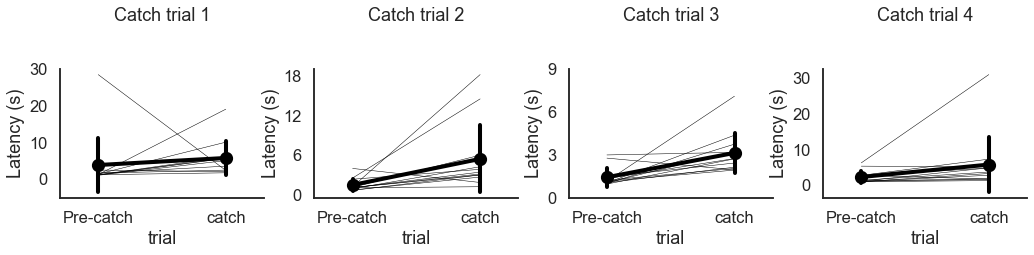

In [6]:
colors=['orange', 'indigo', 'deepskyblue', 'crimson']
sns.set(context='talk', style='white')
plt.figure(dpi=300)
g=sns.catplot(kind='point', col='catch_nr', sharey=False,
              data=subset, x='trial', y='latency_to_choice', ci='sd', estimator=np.mean,
              join=True, hue='catch_nr', palette=4*['black'],
              height=3, aspect=1.2)

ax=g.axes.flatten()
ticks_range=[range(0,32,10), range(0,22,6), range(0,12,3), range(0,32,10)]
for i in range(4):
    ax[i].set_title('Catch trial {}\n\n'.format(i+1))
    # Collect data by catch number
    data=subset[subset['catch_nr']==i+1]
    data['trial']+=1
    sns.lineplot(data=data, x='trial', y='latency_to_choice', hue='rat', legend=False, ax=ax[i],
                linewidth=.5, palette=12*['black'])
    ax[i].set(yticks=ticks_range[i])
    
g.set(xlabel='trial', ylabel='Latency (s)',
      xticklabels=['Pre-catch','catch'], xlim=[-.3,1.3],
     )
#g.fig.suptitle('Latency to choice expression', y=1.1)
sns.despine()
plt.savefig('latency_to_choice_pre_vs_catch_split_by_trial_nr.svg')

,trial,statistic,p,kurtosis,skewness
1,0.0,0.747193,0.002498,5.533571,2.189871
2,0.0,0.687336,0.000638,2.772870,1.933553
3,0.0,0.779537,0.005535,4.829542,2.039546
4,0.0,0.528374,0.000029,10.507011,3.170944


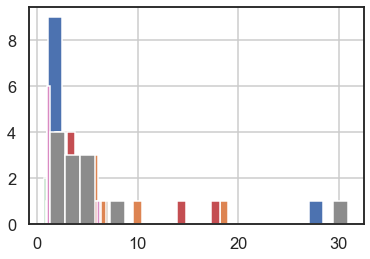

In [37]:
results=pd.DataFrame()
for nr in [1,2,3,4]:
    for trial in [-1,0]:
        results.loc[nr, 'trial']=trial
        
        group=subset.loc[(subset['trial']==trial)& (subset['catch_nr']==nr), 'latency_to_choice']
        
        stat, p = shapiro(group)
        results.loc[nr, 'statistic']=stat
        results.loc[nr, 'p']=p
        results.loc[nr,'kurtosis']=group.kurt()
        results.loc[nr,'skewness']=group.skew()
        group.hist(bins=20)
results

In [42]:
results=pd.DataFrame(index=range(1,5), columns=['w', 'p'])

for nr in subset.catch_nr.unique():

    # Subdivide by pre and catch trial
    pre=subset[(subset['trial']==-1)& (subset['catch_nr']==nr)]
    catch=subset[(subset['trial']==0) & (subset['catch_nr']==nr)]
    
    w,p = wilcoxon(pre['latency_to_choice'],catch['latency_to_choice'])
    results.loc[nr, 'w']=w
    results.loc[nr, 'p']=p
results

,w,p
1,13.0,0.04248
2,6.0,0.006836
3,3.0,0.002441
4,6.0,0.006836


##### How do the latencies between catch trials compare?

In [43]:
subset=latencies[latencies['trial']==0]

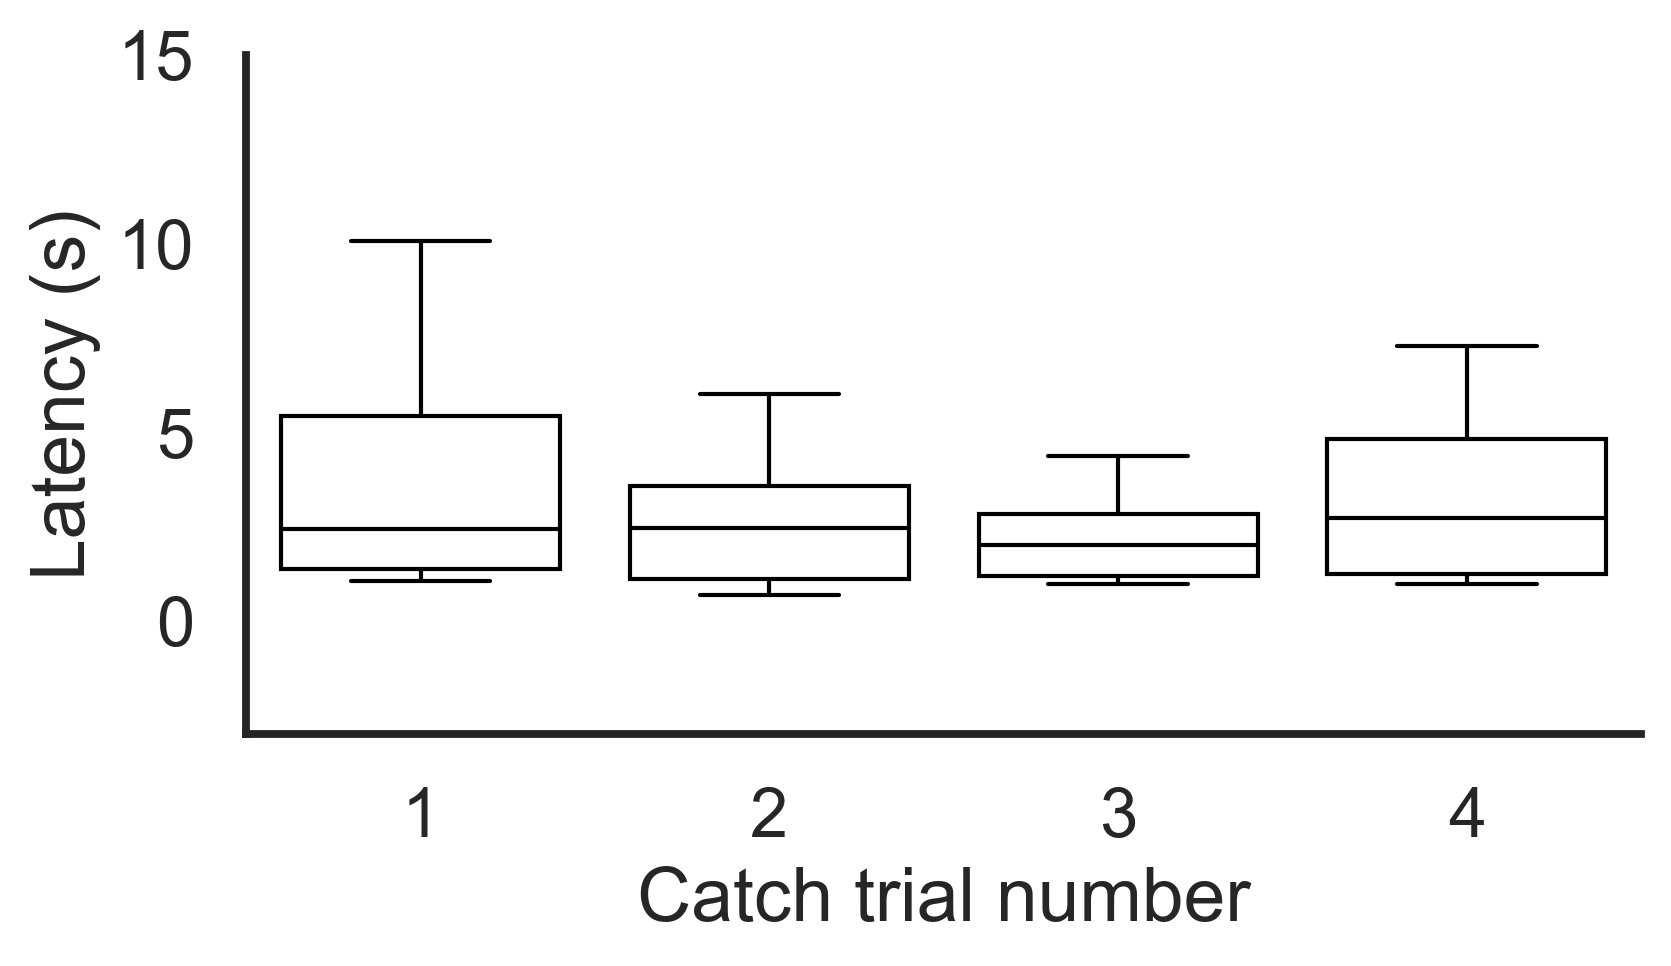

In [7]:
PROPS={
    'boxprops':{'facecolor':'none', 'linewidth':1},
    'whiskerprops':{'linewidth':1},
    'capprops':{'linewidth':1}, 
    'medianprops':{'linewidth':1}
}

sns.set(context='talk', style='white')
plt.figure(figsize=(6,3), dpi=300)
g=sns.boxplot(data=subset, x='catch_nr', y='latency_to_choice',
              color='black', fliersize=0, **PROPS
              )
g.set(ylabel='Latency (s)', xlabel='Catch trial number',
     ylim=[-3,15])
sns.despine()
plt.savefig('latency_to_choice_catch_split_by_trial_nr.svg')

,statistic,p,kurtosis,skewness
1,0.747193,0.002498,5.533571,2.189871
2,0.687336,0.000638,2.772870,1.933553
3,0.779537,0.005535,4.829542,2.039546
4,0.528374,0.000029,10.507011,3.170944


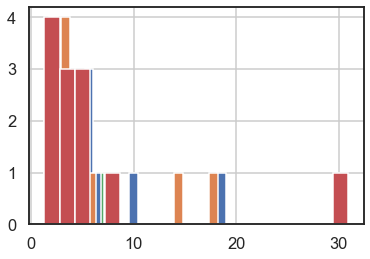

In [46]:
results=pd.DataFrame()
for nr in subset.catch_nr.unique():
    group=subset.loc[subset['catch_nr']==nr, 'latency_to_choice']
        
    stat, p = shapiro(group)
    results.loc[nr, 'statistic']=stat
    results.loc[nr, 'p']=p
    results.loc[nr,'kurtosis']=group.kurt()
    results.loc[nr,'skewness']=group.skew()
    group.hist(bins=20)
results

In [47]:
catch1=subset[subset['catch_nr']==1]
catch2=subset[subset['catch_nr']==2]
catch3=subset[subset['catch_nr']==3]
catch4=subset[subset['catch_nr']==4]
col='latency_to_choice'
friedmanchisquare(catch1[col], catch2[col], catch3[col], catch4[col])

FriedmanchisquareResult(statistic=2.700000000000017, pvalue=0.44022729436022834)

##### Is there a difference between the latencies from non-matches to location vs. non-matches to action catch trials?

In [11]:
catch_info=pd.read_excel('ALLOEGOPROTOCOL_OUTCOMES.xlsx', index_col=None).iloc[:,0:6]
cols=catch_info.columns.to_list()
lowered_cols= [col.lower() for col in cols]
catch_info.columns=lowered_cols

In [12]:
catch_latencies=latencies[latencies['trial']==0].reset_index(drop=True)

In [13]:
cols=['latency_t1', 'latency_t2', 'latency_to_choice']
catch_info[cols]=catch_latencies[cols]
catch_info.head()

,rat,catch_nr,session_nr,sample_side,test_side,outcome,latency_t1,latency_t2,latency_to_choice
0,1,1,3,1,1,E,5.18,4.88,10.06
1,1,2,6,2,1,A,12.62,5.56,18.18
2,1,3,8,1,2,A,2.49,0.79,3.28
3,1,4,9,2,2,E,1.47,0.35,1.82
4,2,1,8,1,2,A,3.20,2.93,6.13


In [16]:
def plot_latencies_by_outcome(col, title):
    plt.figure(figsize=(4,3), dpi=300)
    sns.set(style='white', context='talk')
    
    g=sns.boxplot(
        data=catch_info, 
        y=col, x='outcome',
        palette=['mediumseagreen', 'royalblue'])
    
    g.set(xlim=[-.6,1.6], ylim=[0,12],
          ylabel='Latency to choice (s)', xlabel='Non match', 
          xticklabels=['action', 'location'])
    sns.despine()

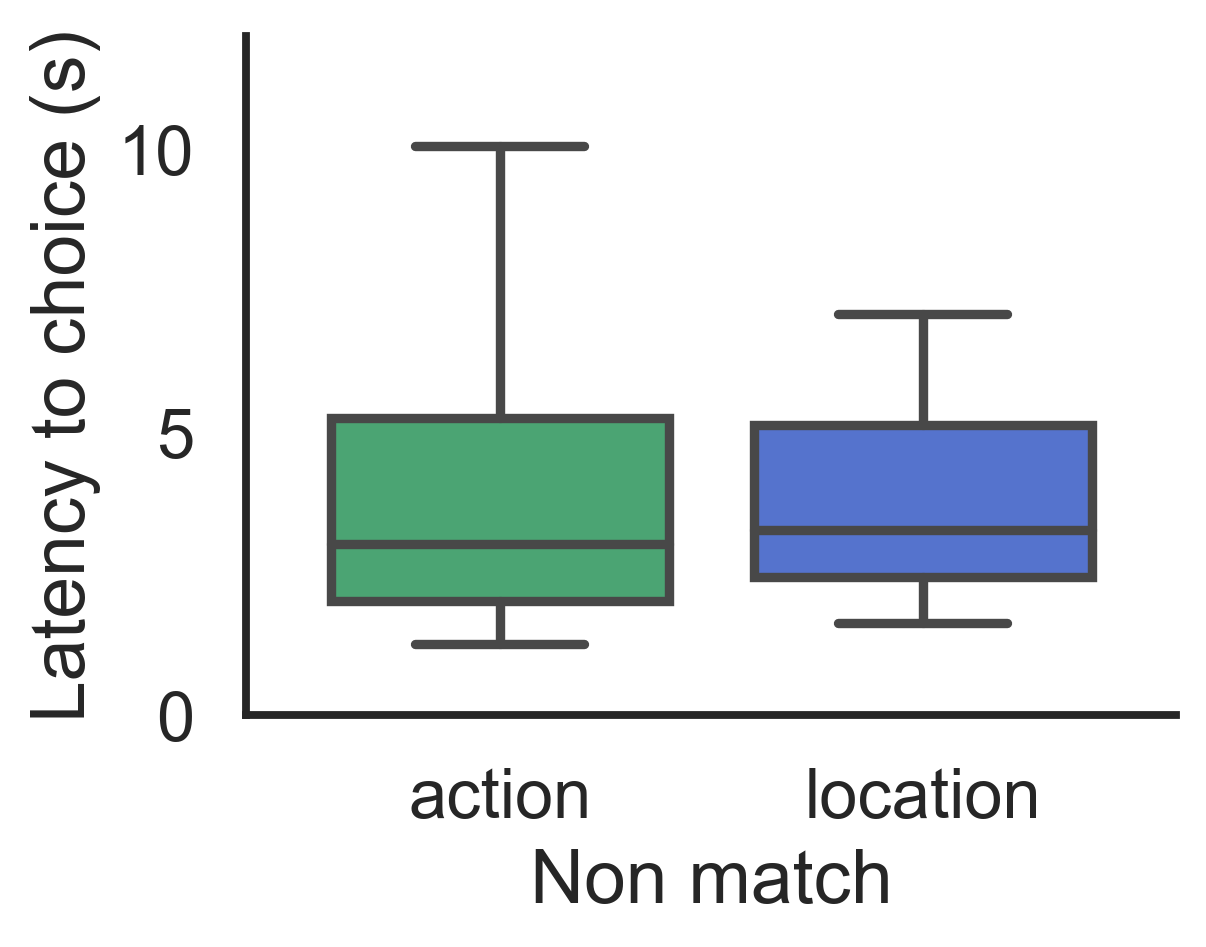

In [17]:
plot_latencies_by_outcome('latency_to_choice', "Latency to choice expression in catch trials\n" )
plt.savefig('latencies_action_vs_location.svg')

,statistic,p,kurtosis,skewness
E,0.517715,1.271028e-07,16.804526,3.894945
A,0.652216,1.766334e-06,4.018583,2.209745


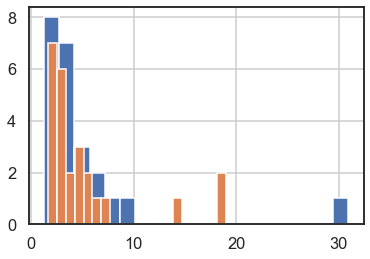

In [53]:
results=pd.DataFrame()
for i in ['E','A']:
    
    group=catch_info.loc[catch_info.outcome==i, 'latency_to_choice']
        
    stat, p = shapiro(group)
    results.loc[i, 'statistic']=stat
    results.loc[i, 'p']=p
    results.loc[i,'kurtosis']=group.kurt()
    results.loc[i,'skewness']=group.skew()
    group.hist(bins=20)
results

In [54]:
from scipy.stats import mannwhitneyu
location=catch_info[catch_info['outcome']=='A']
action=catch_info[catch_info['outcome']=='E']

mannwhitneyu(location['latency_to_choice'], action['latency_to_choice'])

MannwhitneyuResult(statistic=257.0, pvalue=0.2679162683076338)

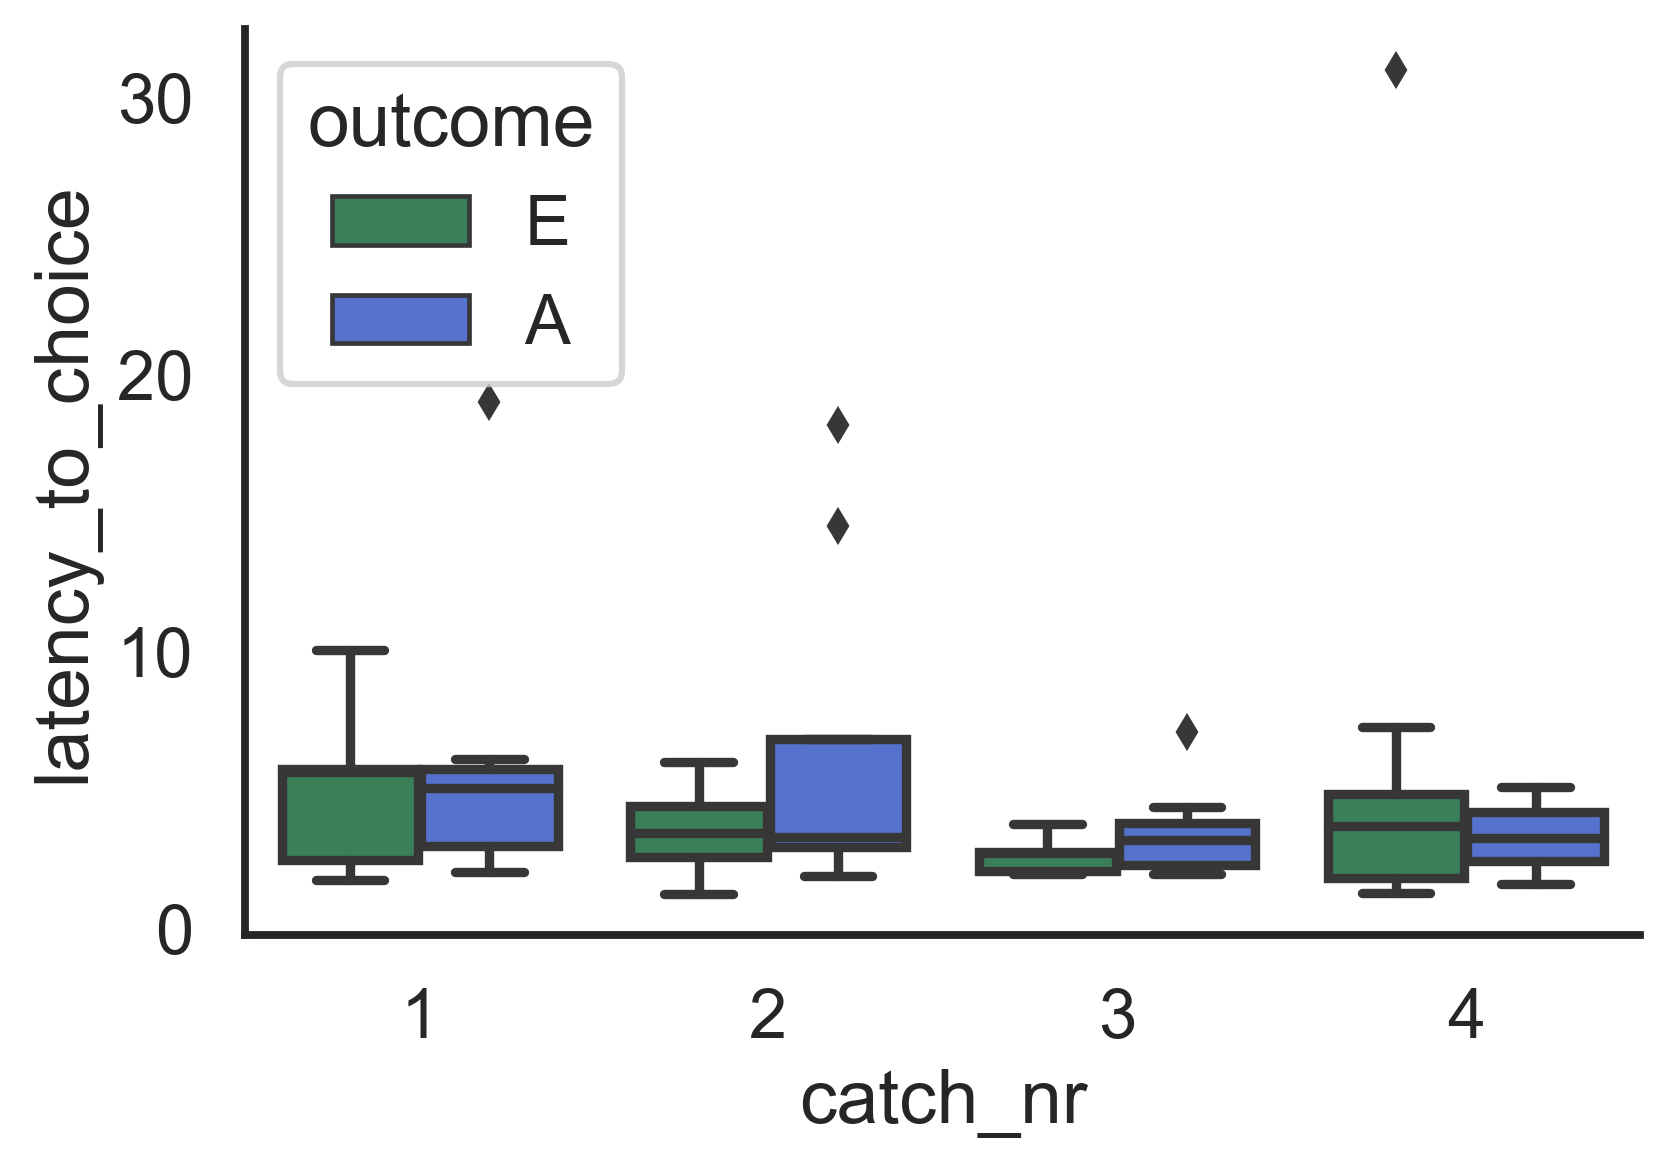

In [60]:
plt.figure(dpi=300)
sns.boxplot(data=catch_info, y='latency_to_choice',
           x='catch_nr', hue='outcome', palette=['seagreen','royalblue'])
sns.despine()